## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

In [5]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata_df,study_results_df, how="inner", on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df=combined_data.drop([combined_data.index[908],combined_data.index[910],
                                 combined_data.index[912],combined_data.index[914],
                                 combined_data.index[916]])

In [14]:
# Checking the number of mice in the clean DataFrame.
cleandata_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_mean=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_mean=summary_mean.rename(columns={"Tumor Volume (mm3)": "mean"})

summary_median=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_median=summary_median.rename(columns={"Tumor Volume (mm3)": "median"})

summary_var=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_var=summary_var.rename(columns={"Tumor Volume (mm3)": "variance"})

summary_std=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_std=summary_std.rename(columns={"Tumor Volume (mm3)": "standard deviation"})


summary_sem=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_sem=summary_sem.rename(columns={"Tumor Volume (mm3)": "SEM"})



In [47]:
summary_df=pd.merge(summary_mean,summary_median, how="inner", on="Drug Regimen")


,mean,median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.382993,50.783528
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [48]:
summary_df=pd.merge(summary_df,summary_var, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.382993,50.783528,43.220205
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [49]:
summary_df=pd.merge(summary_df,summary_std, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance,standard deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.382993,50.783528,43.220205,6.574208
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [50]:
summary_df=pd.merge(summary_df,summary_sem, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_ag=cleandata_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", np.median,"var","std","sem"]})

# Using the aggregation method, produce the same summary statistics in a single line
summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Figure size 432x288 with 0 Axes>

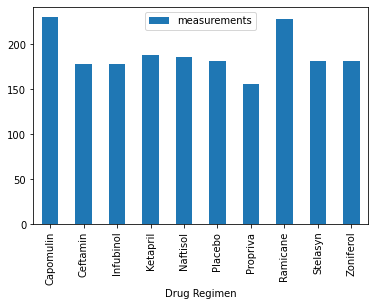

In [83]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df=pd.DataFrame(cleandata_df.groupby("Drug Regimen")['Mouse ID'].count())
measurements_df=measurements_df.rename(columns={"Mouse ID": "measurements"})
measurements_df
plt.figure()
measurements_df.plot.bar()

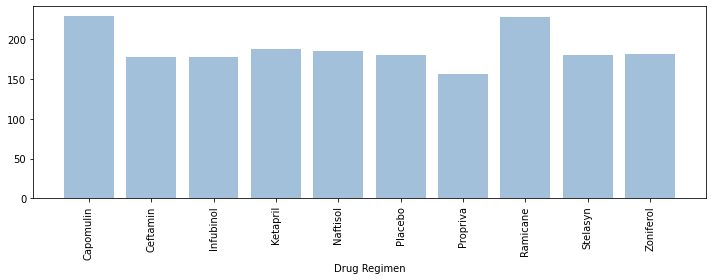

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=measurements_df.index
plt.figure(figsize=(10,4))
plt.bar(x_axis,measurements_df['measurements'], color= 'steelblue', alpha=0.5)
plt.xticks(x_axis, measurements_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D061AA5820>],
      dtype=object)

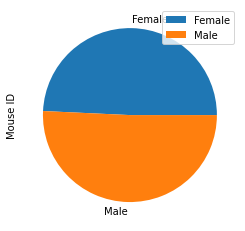

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution=pd.DataFrame(cleandata_df.groupby("Sex")['Mouse ID'].count())
sex_distribution.plot.pie(subplots=True, figsize=(6, 4))

([<matplotlib.patches.Wedge at 0x1d06158de50>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

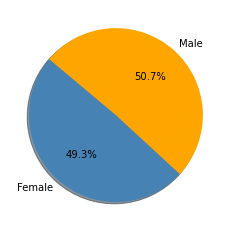

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_list=sex_distribution['Mouse ID'].values.tolist()
labels=sex_distribution.index.values.tolist()
colors = ["steelblue", "orange"]
plt.pie(distribution_list, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
